In [4]:
import pandas as pd

In [14]:
df = pd.read_csv('olympics.csv', skiprows=4)
df.head(6)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze


In [16]:
df[df.Athlete.str.contains('OWENS, Jesse')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,M,Gold


In [32]:
gm = df[(df.Medal == 'Gold') & (df.Gender == 'Men') & (df.Event == '100m')].sort_values('Edition', ascending=False)
gm[['City', 'Edition', 'Athlete', 'NOC']].head()

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR


In [100]:
import matplotlib.pyplot as plt

In [101]:
%matplotlib inline

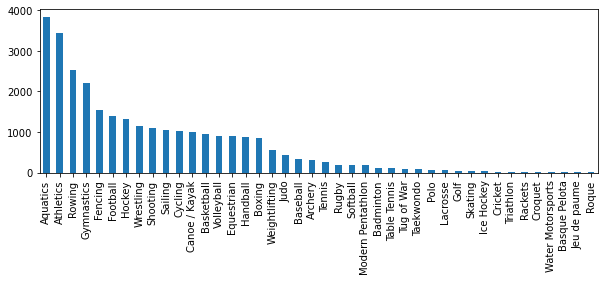

In [43]:
df.Sport.value_counts().plot(kind='bar', figsize=(10, 3));

In [59]:
import seaborn as sns

<AxesSubplot:xlabel='Medal', ylabel='count'>

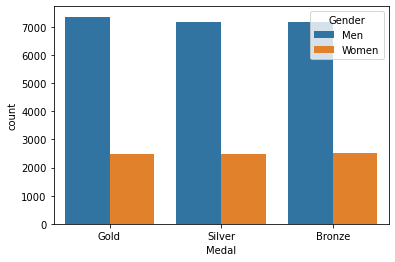

In [47]:
sns.countplot(x='Medal', data=df, hue='Gender')

<AxesSubplot:>

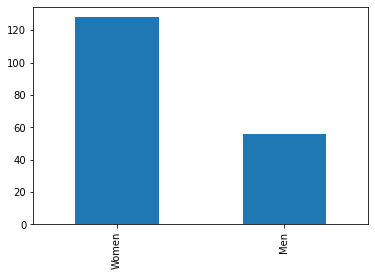

In [55]:
cTeam = df[(df.NOC == 'CHN') & (df.Edition == 2008)]
cTeam.Gender.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Gender', ylabel='count'>

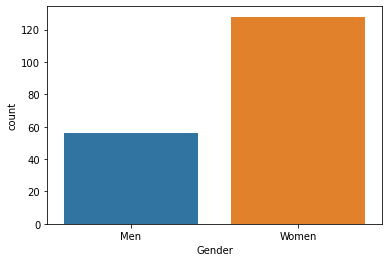

In [62]:
sns.countplot(x='Gender', data=cTeam)

<AxesSubplot:>

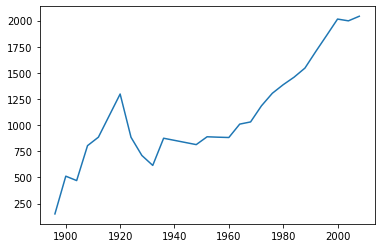

In [81]:
df.Edition.value_counts().sort_index().plot()

In [69]:
last_oly = df[df.Edition == 2008]
last_oly.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver


In [70]:
noc = pd.read_csv('Summer Olympic medallists 1896 to 2008 - IOC COUNTRY CODES.csv')
noc.head()

,Country,Int Olympic Committee code,ISO code,Country.1
0,Afghanistan,AFG,AF,Afghanistan
1,Albania,ALB,AL,Albania
2,Algeria,ALG,DZ,Algeria
3,American Samoa*,ASA,AS,American Samoa*
4,Andorra,AND,AD,Andorra


In [71]:
noc.set_index('Int Olympic Committee code', inplace=True)
noc.head()

,Country,ISO code,Country.1
Int Olympic Committee code,,,
AFG,Afghanistan,AF,Afghanistan
ALB,Albania,AL,Albania
ALG,Algeria,DZ,Algeria
ASA,American Samoa*,AS,American Samoa*
AND,Andorra,AD,Andorra


In [73]:
medal_2008 = last_oly.NOC.value_counts()
medal_2008.head()

USA    315
CHN    184
AUS    149
RUS    143
GER    101
Name: NOC, dtype: int64

In [75]:
noc['medal_2008'] = medal_2008
noc.head()

,Country,ISO code,Country.1,medal_2008
Int Olympic Committee code,,,,
AFG,Afghanistan,AF,Afghanistan,1.0
ALB,Albania,AL,Albania,NaN
ALG,Algeria,DZ,Algeria,2.0
ASA,American Samoa*,AS,American Samoa*,NaN
AND,Andorra,AD,Andorra,NaN


In [76]:
noc[noc.medal_2008.isnull()]

,Country,ISO code,Country.1,medal_2008
Int Olympic Committee code,,,,
ALB,Albania,AL,Albania,NaN
ASA,American Samoa*,AS,American Samoa*,NaN
AND,Andorra,AD,Andorra,NaN
ANG,Angola,AO,Angola,NaN
ANT,Antigua and Barbuda,AG,Antigua and Barbuda,NaN
...,...,...,...,...
URU,Uruguay,UY,Uruguay,NaN
VAN,Vanuatu,VU,Vanuatu,NaN
ISV,Virgin Islands*,VI,Virgin Islands*,NaN


<AxesSubplot:xlabel='Edition'>

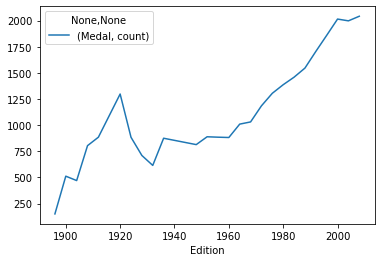

In [80]:
df.groupby('Edition').agg({'Medal' : ['count']}).sort_values(by='Edition').plot()

In [85]:
df.groupby('NOC').agg({'Edition' : ['count', 'min', 'max']})

Edition            
      count   min   max
NOC                    
AFG       1  2008  2008
AHO       1  1988  1988
ALG      14  1984  2008
ANZ      29  1908  1912
ARG     239  1924  2008
..      ...   ...   ...
VIE       2  2000  2008
YUG     435  1924  2000
ZAM       2  1984  1996
ZIM      23  1980  2008
ZZX      48  1896  1904

[138 rows x 3 columns]

In [86]:
df.groupby('NOC').size()

NOC
AFG      1
AHO      1
ALG     14
ANZ     29
ARG    239
      ... 
VIE      2
YUG    435
ZAM      2
ZIM     23
ZZX     48
Length: 138, dtype: int64

In [ ]:




#reshapin challenge not solved yet
#research RESHAPING





In [87]:
last_oly

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [88]:
last_oly.groupby(['NOC', 'Medal']).size()

NOC  Medal 
AFG  Bronze     1
ALG  Bronze     1
     Silver     1
ARG  Bronze    31
     Gold      20
               ..
UZB  Silver     2
VEN  Bronze     1
VIE  Silver     1
ZIM  Gold       1
     Silver     3
Length: 188, dtype: int64

In [95]:
temp = last_oly.groupby(['NOC', 'Medal']).size().unstack('Medal', fill_value=0)
temp.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)

Medal,Bronze,Gold,Silver
NOC,,,
USA,81,125,109
CHN,57,74,53
RUS,56,43,44
GER,43,42,16
KOR,26,41,11
...,...,...,...
ISR,1,0,0
MDA,1,0,0
MRI,1,0,0


In [97]:
temp = temp.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver', 'Bronze']]
temp

Medal,Gold,Silver,Bronze
NOC,,,
USA,125,109,81
CHN,74,53,57
RUS,43,44,56
GER,42,16,43
KOR,41,11,26
...,...,...,...
ISR,0,0,1
MDA,0,0,1
MRI,0,0,1


In [98]:
temp = temp.transpose()
temp

NOC,USA,CHN,RUS,GER,KOR,NED,AUS,GBR,FRA,JPN,...,VIE,ARM,TPE,AFG,EGY,ISR,MDA,MRI,TOG,VEN
Medal,,,,,,,,,,,,,,,,,,,,,
Gold,125,74,43,42,41,40,31,31,25,23,...,0,0,0,0,0,0,0,0,0,0
Silver,109,53,44,16,11,18,42,25,23,11,...,1,0,0,0,0,0,0,0,0,0
Bronze,81,57,56,43,26,4,76,21,28,17,...,0,6,4,1,1,1,1,1,1,1


<AxesSubplot:xlabel='NOC', ylabel='Medal'>

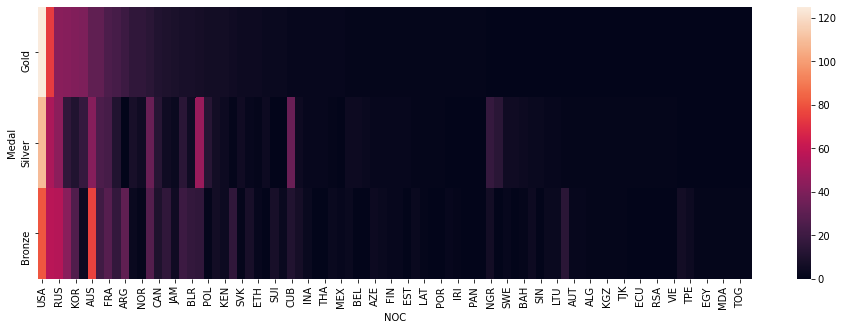

In [107]:
plt.figure(figsize=(16,5))
sns.heatmap(temp)

In [112]:
gy = df[df.NOC == 'USA']
gy = gy.groupby(['Edition', 'Athlete', 'Medal']).size().unstack('Medal', fill_value=0)
gy['Total'] = gy['Gold'] + gy['Silver'] + gy['Bronze']
gy.reset_index(inplace=True)
for year, group in gy.groupby('Edition'):
    print(group.sort_values('Total', ascending=False)[:1].unstack())
# NOT COMPLETE

Medal     
Edition  5               1896
Athlete  5    GARRETT, Robert
Bronze   5                  0
Gold     5                  2
Silver   5                  2
Total    5                  4
dtype: object
Medal      
Edition  14              1900
Athlete  14    BAXTER, Irving
Bronze   14                 0
Gold     14                 2
Silver   14                 3
Total    14                 5
dtype: object
Medal       
Edition  153            1904
Athlete  153    HEIDA, Anton
Bronze   153               0
Gold     153               5
Silver   153               1
Total    153               6
dtype: object
Medal       
Edition  363                1908
Athlete  363    SHERIDAN, Martin
Bronze   363                   1
Gold     363                   2
Silver   363                   0
Total    363                   3
dtype: object
Medal       
Edition  421                     1912
Athlete  421    OSBURN, Carl Townsend
Bronze   421                        1
Gold     421                        